##**Name - Affan**
##**Roll No. - 242210001**
##**Date - 28/01/2025**

# **Data Exploration and Preprocessing:**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

data = pd.read_csv('/content/diabetes.csv')
data.head()


In [ ]:
print(data.isnull().sum())
# no missing values

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [ ]:
#3. Perform feature scaling:
scaler = StandardScaler()
X = data.drop('Outcome', axis=1)
y = data['Outcome']
X_scaled = scaler.fit_transform(X)

# **Model Implementation:**

In [ ]:
# Model Implementation:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
model = DecisionTreeClassifier(random_state = 42)
model.fit(X_train, y_train)

print("\n Training Done")


 Training Done


In [ ]:

from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report

# using gini index:
model_gini = DecisionTreeClassifier(criterion='gini', random_state=42)
model_gini.fit(X_train, y_train)

#Using Entropy:
model_entropy = DecisionTreeClassifier(criterion='entropy', random_state=42)
model_entropy.fit(X_train, y_train)


#compare performance:
y_pred_gini = model_gini.predict(X_test)
y_pred_entropy = model_entropy.predict(X_test)


print("Gini - Accuracy:", accuracy_score(y_test, model_gini.predict(X_test)))
print("Entropy - Accuracy:", accuracy_score(y_test, y_pred_entropy))



Gini - Accuracy: 0.7467532467532467
Entropy - Accuracy: 0.7337662337662337


# **Performance Evaluation:**

Accuracy: 0.7467532467532467
Precision: 0.625
Recall: 0.7272727272727273

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.76      0.79        99
           1       0.62      0.73      0.67        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



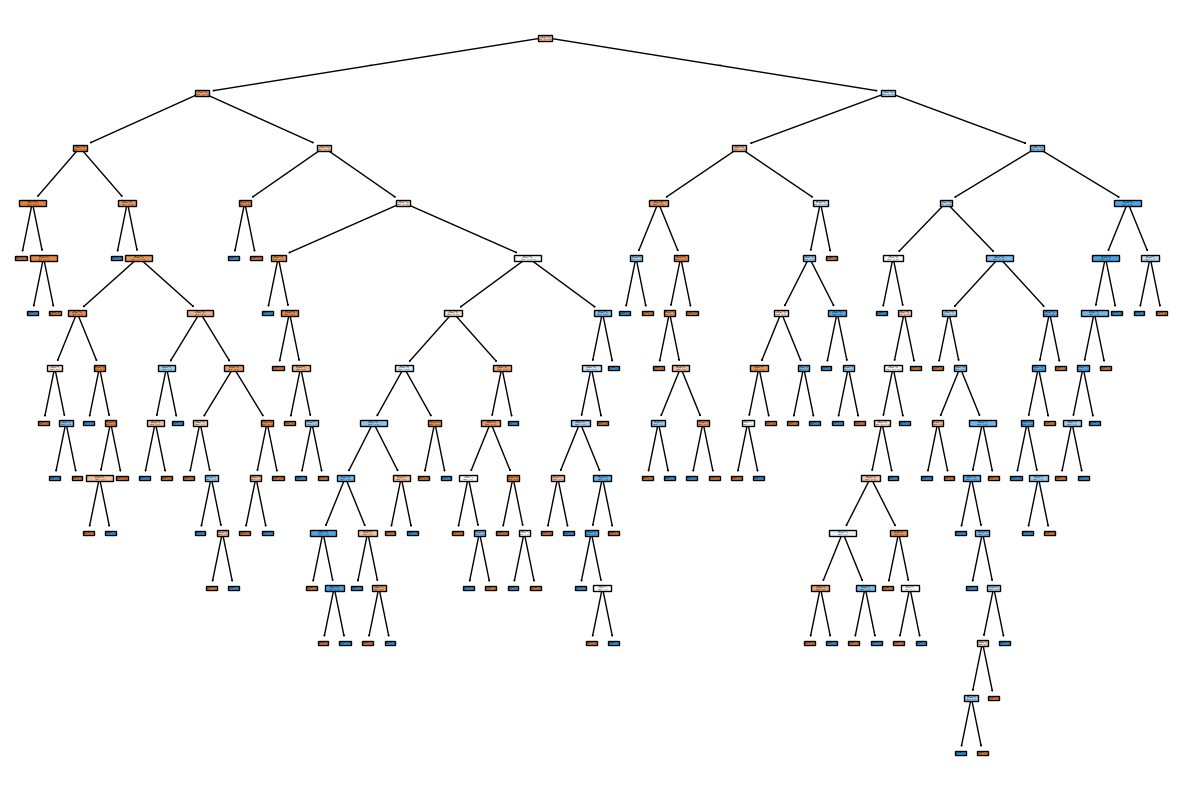

In [ ]:
# performance evaluation;

from sklearn.tree import plot_tree

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

print("\nClassification Report:\n", classification_report(y_test, y_pred))


plt.figure(figsize=(15,10))
plot_tree(model, filled=True, feature_names=X.columns)
plt.show()



# **Observational Questions:**

**Q1.** Which splitting criterion (Gini Index or Entropy) performed better for this dataset and why might that be the case?

**Ans:** Gini Index and Entropy are both measures of impurity used by decision trees to decide where to split data. The goal is to create splits that result in more "pure" subsets, where data points within each subset are more similar in terms of their outcome (diabetes presence in this case).In this case both Gini and Entropy resulted in very similar accuracy scores for the decision tree model. This suggests that, for this specific dataset and model setup, neither criterion had a significant advantage over the other. This often happens in practice, as the two metrics are quite similar in their behavior.


**Q2.** Is there any noticeable trend between "BMI" and diabetes presence in the dataset?

**Ans:** There is likely a noticeable trend between BMI and diabetes presence in the dataset. Higher BMI values are often associated with an increased risk of developing type 2 diabetes, and this relationship is likely reflected in the data.It would be expected to see differences in the median, quartiles, and overall distribution of BMI between the two groups, indicating a relationship between BMI and diabetes presence. Additionally, calculating the correlation between BMI and Outcome would provide a numerical measure of this relationship.It would expected to see a positive correlation, indicating that higher BMI values are associated with a higher likelihood of diabetes. Overall, based on medical knowledge and data exploration, a noticeable trend between BMI and diabetes presence is likely present in the dataset.

Decision Tree Classifier

What is a Decision Tree Classifier?

A Decision Tree Classifier is a supervised machine learning algorithm used for classification tasks.

It models decisions and their possible consequences in the form of a tree-like structure. Each internal node of the tree represents a decision based on a feature (attribute), each branch represents an outcome of the decision, and each leaf node represents a final class label (output).


It is called a "tree" because it starts from a root node and branches out into several nodes, just like a natural tree.

How Does It Work?

Choose the Best Feature:
At each step, the algorithm selects the feature that best splits the data into classes. Techniques like Gini Index or Information Gain are used to decide the best split.

Split the Data:
The dataset is split into subsets based on the selected feature.

Repeat Recursively:
Each subset is then split further based on other features until:

All data points in a node belong to the same class, or

Further splitting does not improve accuracy.

Make Predictions:
When making a prediction, the data point is passed through the tree following the decision rules until it reaches a leaf node, where the classification is made.

Key Terms:
Root Node: The first node that represents the entire dataset.

Decision Node: Nodes where the data is split based on a feature.

Leaf Node (Terminal Node): Nodes that represent a class label.

Branch: A split decision from one node to another.

Example:
Imagine you want to classify whether a person will buy a car based on their age and income.

A simple decision tree could look like:

Is Age > 30?

Yes → Check Income

Income > 50k → Buy Car

Income ≤ 50k → Don't Buy Car

No → Don't Buy Car

Advantages of Decision Tree Classifier:
Easy to understand and interpret.

Requires little data preprocessing (no need to scale data).

Can handle both numerical and categorical data.

Useful for feature selection.

Disadvantages:
Prone to overfitting, especially with very deep trees.

Small changes in the data can result in a completely different tree (not stable).

Common Use Cases:
Medical diagnosis

Fraud detection

Customer segmentation

Credit risk analysis

